This project implements MNIST recognition via Python. I 

In [3]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [4]:
data = np.load('mnist.npz')
X_test_total, X_train_total, y_train_total, y_test_total = data['x_test'], data['x_train'], data['y_train'], data['y_test']

Let's select two digits that we will be learning to separate, for example 3 and 8.

In [5]:
num1, num2 = 3, 8

Let us form the lists of indices i such that the target of i-th object of our training data is either num1 or num2. Do the same for the test dataset.

In [6]:
train_indx = [y == num1 or y == num2 for y in y_train_total] 
test_indx = [y == num1 or y == num2 for y in y_test_total]

Form new arrays consisting of the data with the target values num1 and num2 only. 

In [7]:
X_train, y_train = X_train_total[train_indx], y_train_total[train_indx]
X_test, y_test = X_test_total[test_indx], y_test_total[test_indx]

Let us check the sizes of the datasets and the shape of one image.

In [8]:
print('Data shapes: ')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

Data shapes: 
X_train:  (11982, 28, 28)
y_train:  (11982,)
X_test:  (1984, 28, 28)
y_test:  (1984,)


In [9]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

n_train, n_test

(11982, 1984)

In [10]:
print('Shape of one item: ')
print(X_train[0].shape)

Shape of one item: 
(28, 28)


Train data are images of digits.

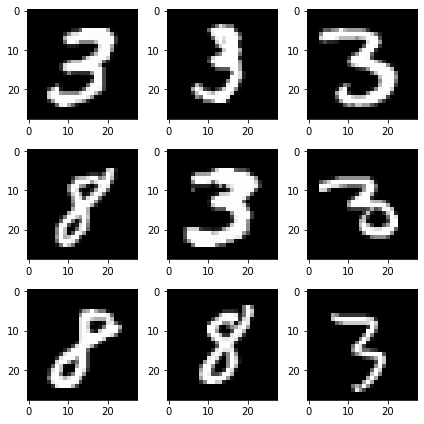

In [11]:
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    plt.imshow(X_train[i], cmap='gray')
plt.tight_layout()
plt.show()

Target values are numbers.

In [12]:
y_train[:9]

array([3, 3, 3, 8, 3, 3, 8, 8, 3], dtype=uint8)

Now our data is 3-dimensional of shape (number of images, n_pixels, n_pixels). To work with PCA and SVM we need to flatten the images by turning each of them into an array of shape (n_pixels x n_pixels, ).

In [13]:
def flatten_image(X):
    return X.reshape(X.shape[0]*X.shape[0]).T

In [14]:
X_train_flat = np.array([flatten_image(img) for img in X_train])
X_test_flat = np.array([flatten_image(img) for img in X_test])
X_test_flat.shape, X_test_flat.shape

((1984, 784), (1984, 784))

In [15]:
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

Now, we call PCA and reduce the number of components for each vector. 

In [16]:
pca = PCA(n_components=128, random_state=42)
X_train_flat = pca.fit_transform(X_train_flat)

In [17]:
X_test_flat = pca.transform(X_test_flat)

In [18]:
X_test_flat.shape, X_test_flat.shape

((1984, 128), (1984, 128))

Now, we use SVM with linear kernel to separate the two classes.

In [19]:
%%time
clf = LinearSVC(random_state=42, max_iter=1000, dual=False)
clf.fit(X_train_flat, y_train) 

CPU times: user 10.9 s, sys: 98.2 ms, total: 11 s
Wall time: 11.1 s


LinearSVC(dual=False, random_state=42)

In [20]:
y_true = y_train
y_pred = clf.predict(X_train_flat)
acc = accuracy_score(y_true, y_pred)
print("Test accuracy: ", acc)

Test accuracy:  0.971791019863128


In [21]:
from scipy import misc
from PIL import Image

In [22]:
image = Image.open('8-3.png').convert('L')
new_image = image.resize((28, 28))
custom = np.array(new_image)
custom.shape

(28, 28)

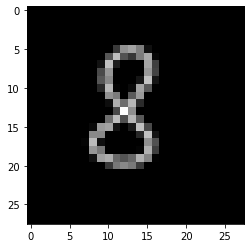

In [23]:
plt.imshow(custom, cmap='gray')
plt.show()

Re-shape your image and make a prediction. 

In [24]:
custom = flatten_image(custom).reshape(1, -1)
custom = scaler.transform(custom)
custom = pca.transform(custom)
custom.shape

(1, 128)

In [25]:
clf.predict(custom)

array([8], dtype=uint8)

In [26]:
def getSingularVectorsLeft(matrix, number=10): 
    u, s, vt = svd(matrix)
    return u[:, :number]

In [27]:
def getSingularImage(X_train, y_train, number):
    idx = [y == number for y in y_train]
    select_images = X_train[idx]
    A = np.zeros((select_images[0].shape[0] ** 2, 1))
    for image in select_images:
        A = np.hstack((A, np.reshape(image, (len(image)**2, 1))))
    A = A[:, 1:]
    left_basis = getSingularVectorsLeft(A)
    return left_basis

Try it first on "0".

In [28]:
left_basis = getSingularImage(X_train_total, y_train_total, 0)
assert left_basis.shape, (784, 10)

Plot first 9 singular images of the digit 0 taking columns of matrix U and reshaping them back into images 28x28. 

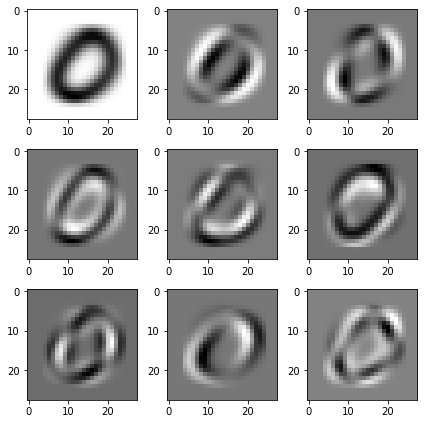

In [29]:
#singular images
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    img = left_basis[:, i].reshape(28, 28)
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [30]:
number_basis_matrices = []
number_basis_matrices.append(getSingularImage(X_train_total, y_train_total, 0))
number_basis_matrices.append(getSingularImage(X_train_total, y_train_total, 1))
number_basis_matrices.append(getSingularImage(X_train_total, y_train_total, 2))
number_basis_matrices.append(getSingularImage(X_train_total, y_train_total, 3))
number_basis_matrices.append(getSingularImage(X_train_total, y_train_total, 4))
number_basis_matrices.append(getSingularImage(X_train_total, y_train_total, 5))
number_basis_matrices.append(getSingularImage(X_train_total, y_train_total, 6))
number_basis_matrices.append(getSingularImage(X_train_total, y_train_total, 7))
number_basis_matrices.append(getSingularImage(X_train_total, y_train_total, 8))
number_basis_matrices.append(getSingularImage(X_train_total, y_train_total, 9))

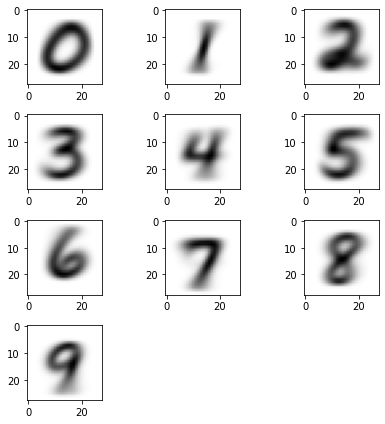

In [31]:
plt.figure(figsize=(6,6))
a, b = 3, 4
for i in range(10):  
    plt.subplot(b, a, i+1)
    img = number_basis_matrices[i][:, 0].reshape(28, 28)
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()